<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q6_teleCust_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

Account_Length,Voice_Mail_Plan,Voic.txt  sample_data


Best k: 5 with Accuracy: 0.5000

=== KNN Classification Report ===
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.00      0.00      0.00         2
      Medium       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


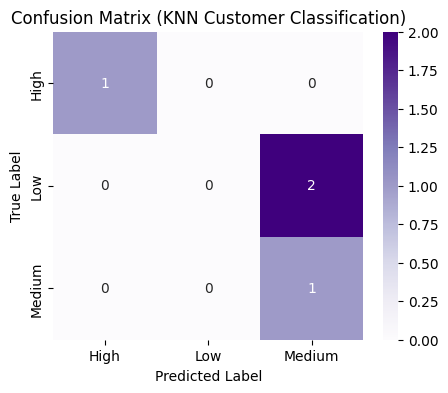

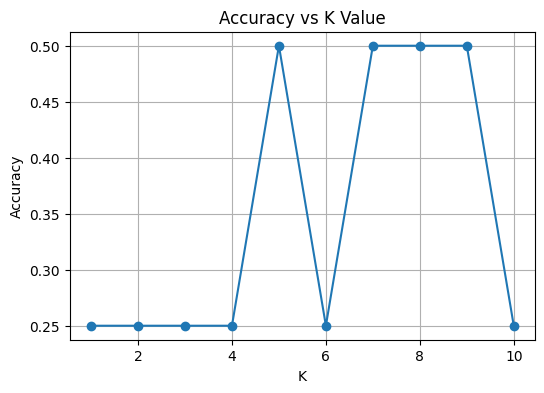

In [3]:
# KNN Algorithm for Telecom Customer Classification
# Dataset: teleCust.csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Load Dataset ----------------
data = pd.read_csv("Account_Length,Voice_Mail_Plan,Voic.txt")

# Encode categorical variable 'Category'
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])  # High=0, Medium=1, Low=2 (depends on encoding)

# Features and Target
X = data.drop('Category', axis=1)
y = data['Category']

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------- Feature Scaling ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- KNN Model ----------------
# Try multiple k values and pick best
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Best k: {best_k} with Accuracy: {best_accuracy:.4f}")

# ---------------- Final Model ----------------
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

# ---------------- Evaluation ----------------
print("\n=== KNN Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (KNN Customer Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Accuracy vs K
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()